# Lecture 10

Chance and Sampling

## The "Monty Hall" Problem

<img src="./monty.svg" width=75% />

## Discussion question

- You originally selected door #1.
- The host reveals door #3 to have a goat behind it.
- You should:

    - A) keep with door number #1; it has just as high a chance of winning as door #2.
    - B) switch to door number #2; it has a higher chance of winning than door #1.

## Marilyn vos Savant's column


<div style="display: flex; margin-top: .5in">
<div style="width: 45%;">
    <ul>
        <li>vos Savant asked the question in <i>Parade</i> magazine.</li>
        <li>She stated the correct answer: <i>switch</i>.</li>
        <li>Received over 10,000 letters in disagreement.</li>
        <li>Over 1,000 letters from people with Ph.D.s</li>
    </ul>
</div>
<div style="width: 50%;">
    <img src="vos_savant.jpg" width=75%>
</div>
</div>


## In this lecture...

- Simulate the Monty Hall problem many times.
- Convince ourselves that switching is the best option.

In [1]:
#: the usual suspects
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Random Selection

## Making a random choice

- `np.random.choice(options)`
- Return a random element.

In [11]:
# simulate a coin flip
np.random.choice(['Heads', 'Tails'])

'Heads'

## Making multiple random choices

- `np.random.choice(options, n)`

In [12]:
#: simulate 10 coin flips
np.random.choice(['Heads', 'Tails'], 10)

array(['Tails', 'Heads', 'Tails', 'Tails', 'Tails', 'Tails', 'Heads',
       'Tails', 'Tails', 'Heads'], dtype='<U5')

## Replacement vs. without replacement

- By default, this selects *with* replacement.
- That is, after making selection, that option is still available.
- If an option can only be selected once, select *without* replacement.

In [22]:
#: make a random team, without replacement
people = ['Winona', 'Xanthippe', 'Yvonne', 'Zelda']
np.random.choice(people, 3, replace=False)

array(['Yvonne', 'Zelda', 'Xanthippe'], dtype='<U9')

# Simulation

## Flipping coins

- What is the probability of getting 60 or more heads if I flip 100 coins?
- Approximation through simulation:
    1. Figure out how to do one experiment (i.e., flip 100 coins).
    2. Run the experiment a bunch of times.
    3. Find the fraction of times where number of heads >= 60.

## Running the experiment once...

- Use `np.random.choice` to flip 100 coins
- Use `np.count_nonzero` to count number of heads.
- Maybe put it in a function.

In [23]:
coins = np.random.choice(['Heads', 'Tails'], 100)
coins

array(['Heads', 'Heads', 'Tails', 'Tails', 'Heads', 'Tails', 'Tails',
       'Heads', 'Heads', 'Tails', 'Heads', 'Tails', 'Tails', 'Tails',
       'Heads', 'Tails', 'Tails', 'Heads', 'Tails', 'Heads', 'Tails',
       'Heads', 'Heads', 'Heads', 'Heads', 'Heads', 'Tails', 'Heads',
       'Heads', 'Heads', 'Heads', 'Tails', 'Tails', 'Tails', 'Heads',
       'Heads', 'Heads', 'Heads', 'Heads', 'Heads', 'Tails', 'Heads',
       'Tails', 'Heads', 'Tails', 'Heads', 'Heads', 'Tails', 'Heads',
       'Tails', 'Heads', 'Tails', 'Heads', 'Heads', 'Heads', 'Tails',
       'Tails', 'Heads', 'Heads', 'Heads', 'Heads', 'Heads', 'Tails',
       'Heads', 'Heads', 'Heads', 'Heads', 'Heads', 'Heads', 'Heads',
       'Tails', 'Tails', 'Heads', 'Heads', 'Heads', 'Heads', 'Tails',
       'Tails', 'Heads', 'Heads', 'Tails', 'Heads', 'Tails', 'Tails',
       'Heads', 'Heads', 'Heads', 'Heads', 'Heads', 'Heads', 'Heads',
       'Tails', 'Heads', 'Heads', 'Tails', 'Heads', 'Tails', 'Tails',
       'Heads', 'Tai

In [24]:
np.count_nonzero(coins == 'Heads')

63

In [25]:
def coin_experiment():
    coins = np.random.choice(['Heads', 'Tails'], 100)
    return np.count_nonzero(coins == 'Heads')

In [27]:
coin_experiment()

59

## Repeating the experiment

- We can repeat this process many times by using a `for`-loop
- Need to store the results in an array... use `np.append`!

In [34]:
# make head_counts array
n_repetitions = 10000

head_counts = make_array()

for i in np.arange(n_repetitions):
    head_count = coin_experiment()
    head_counts = np.append(head_counts, head_count)

In [35]:
# in how many trials was the number of heads >= 60?
at_least_60 = np.count_nonzero(head_counts >= 60)
at_least_60

277

In [36]:
# what is this as a proportion?
at_least_60 / n_repetitions

0.0277

## Visualizing the distribution

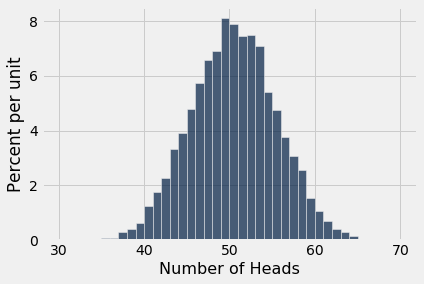

In [39]:
#: visualize distribution of trial results
Table().with_columns(
    'Number of Heads', head_counts
).hist(bins=np.arange(30, 71))

# Simulating Monty Hall

## Simulation strategy

1. Figure out how to simulate one game of Monty Hall.
2. Play a bunch of games.
3. Count the proportion of wins for each strategy (stay or switch).

## Simulating a single game

- We will make a function, `monty_hall()`, which simulates one play.
- Returns a 3-element array describing situation after host reveals first door, before choosing to "stay" or "switch":

```
[
    <prize behind original door>,
    <what is revealed by Monty>,
    <prize behind other door>
]
```

- If the prize behind the original door is the car, staying wins.
- If the prize behind the other door is the car, switching wins.

## Randomly pick an original door

- Randomly assign a prize to the original choice of door.
- You don't know what it is, yet, but Monty does.

In [41]:
#: randomly assign original_door_prize to a prize
prizes = ['Goat 1', 'Goat 2', 'Car']
original_door_prize = np.random.choice(prizes)

## What does Monty reveal?

- If your original door contains the car, Monty reveals a goat at random.
- If your original door contains a goat, Monty reveals the other goat.

In [42]:
#: recall from last lecture...
def other_one(arr, which_is_not):
    if which_is_not == arr.item(0):
        return arr.item(1)
    elif which_is_not == arr.item(1):
        return arr.item(0)
    else:
        print('Invalid input!')
        
other_one(make_array('Goat 1', 'Goat 2'), which_is_not='Goat 1')

'Goat 2'

## What does Monty reveal?

In [45]:
# if original_door_prize is the car...
# assign revealed and other_door_prize

goats = make_array('Goat 1', 'Goat 2')

if original_door_prize == 'Car':
    revealed = np.random.choice(['Goat 1', 'Goat 2'])
    other_door_prize = other_one(goats, which_is_not=revealed)
else: # it is a goat
    revealed = other_one(goats, which_is_not=original_door_prize)
    other_door_prize = 'Car'

## Putting it together...

In [48]:
#: the full monty hall
def monty_hall():
    # randomly assign original_door_prize to a prize
    prizes = ['Goat 1', 'Goat 2', 'Car']
    original_door_prize = np.random.choice(prizes)
    
    goats = make_array('Goat 1', 'Goat 2')

    if original_door_prize == 'Car':
        revealed = np.random.choice(['Goat 1', 'Goat 2'])
        other_door_prize = other_one(goats, which_is_not=revealed)
    else: # it is a goat
        revealed = other_one(goats, which_is_not=original_door_prize)
        other_door_prize = 'Car'

    return make_array(original_door_prize, revealed, other_door_prize)

In [49]:
monty_hall()

array(['Goat 1', 'Goat 2', 'Car'], dtype='<U6')

## Play a bunch of times

In [50]:
#: many simulations
n_repetitions = 100

behind_original = make_array()
behind_revealed = make_array()
behind_other = make_array()

for i in np.arange(n_repetitions):
    result = monty_hall()
    behind_original = np.append(behind_original, result.item(0))
    behind_revealed = np.append(behind_revealed, result.item(1))
    behind_other = np.append(behind_other, result.item(2))

## Counting successes...

In [52]:
#: make a table of results
simulations = Table().with_columns(
    'original', behind_original,
    'revealed', behind_revealed,
    'other', behind_other
)

In [53]:
simulations.group('original')

original,count
Car,32
Goat 1,29
Goat 2,39


In [54]:
simulations.group('other')

other,count
Car,68
Goat 1,13
Goat 2,19


## A simpler simulation...

- A function `simpler_monty_hall()`.
- Returns "switch" if switching was the winning strategy.
- Returns "stay" if staying was the winning strategy.

## Case-by-case

In [56]:
#: a simpler simulation of a single game

def simpler_monty_hall():
    original_prize = np.random.choice(['Car', 'Goat 1', 'Goat 2'])
    
    if original_prize == 'Car':
        # we want to stay!
        return 'stay'
    else:
        # the original prize is a goat. Monty will reveal the other
        # goat. Switching wins!
        return 'switch'

## Play a bunch of times

In [57]:
#: many simulations

n_repetitions = 100

winning_strategies = make_array()
for i in np.arange(n_repetitions):
    winning_strategy = simpler_monty_hall()
    winning_strategies = np.append(winning_strategies, winning_strategy)
    
np.count_nonzero(winning_strategies == 'switch') / n_repetitions

0.64

# Probability

## Probability Theory

- So far, we have approximated some probabilities via simulation.
- But we can calculate them directly using *math*.

## Terminology

- **Outcome**: The result of an experiment.
    - e.g., the possible outcomes of rolling a 6-sided die are 1, 2, 3, 4, 5, 6
    - e.g., the possible outcomes of flipping a coin twice are HH, HT, TH, TT
- **Event**: A set of outcomes.
    - e.g., the event that the die lands on a even number is the collection of outcomes {2, 4, 6}.
    - e.g., the event that there was at least one head in two flips: {HH, HT, TH}
- **Probability**: A number between 0 and 1 which describes likelihood of event.
    - 1 if that event always happens
    - 0 if that event never happens
    - Notation: if $X$ is an event, $P(X)$ is the probability of the event.

## Equally-likely outcomes

- If all outcomes are equally likely, computing probabilities is done by counting:

$$
P(A) = \frac{
    \text{# of outcomes that make $A$ happen}
}{
    \text{total # of outcomes}
}
$$

## Discussion question

I have three cards: red, blue, and green. What is the chance that I choose a card at random, and it is green, then -- without putting it back -- I choose another card at random and it is red?

- A) 1/9
- B) 1/6
- C) 1/3
- D) 2/3
- E) None of the above.

## Discussion question solved

- The possible outcomes are: RG, RB, GR, GB, BR, BG.
- The outcomes are equally-likely.
- There is only one outcome which makes the event happen: GR.
- Hence the probability is $1/6$.

## Conditional probabilities

- Two events $A$ and $B$ can both happen.
    - e.g.: $A$ is event "roll is 3 or less", $B$ is event "roll is even"
- Suppose that we know $A$ has happened, but we don't know if $B$ has.
- If $A$ has happened, we toss out outcomes where $A$ doesn't happen.
- The conditional probability of $B$ given $A$ is:

$$
P(B \text{ given } A)
= \frac{
    \text{# of outcomes satisfying both $A$ and $B$}
}{
    \text{# of outcomes satisfying $A$}
}
$$

## Discussion question

I roll a six-sided die and don't tell you what the result is, but I tell you that it is less than or equal to three. What is the probability that the result is even?

- A) 1/2
- B) 1/3
- C) 1/4
- D) None of the above.

## Discussion problem solved

- There are three outcomes where the roll is three or less: 1, 2, 3
- There are is only one outcome where both $A$ and $B$ happen: 2
- So $P(B \text{ given } A) = 1/ 3$

## Probability that two events both happen

$$
P(A \text{ and } B) = \frac{
    \text{# of outcomes satisfying $A$ and $B$ both}
}{
    \text{total # of outcomes}
}
$$

What is the probability that the roll is even and less than three?

- Only one outcome: 2.
- Six total outcomes.
- Probability is $1/6$.

## Another way to compute that...

We have two formulas with the same numerator:

$$
P(B \text{ given } A)
= \frac{
    \text{# of outcomes satisfying both $A$ and $B$}
}{
    \text{# of outcomes satisfying $A$}
}
$$

$$
P(A \text{ and } B) = \frac{
    \text{# of outcomes satisfying both $A$ and $B$}
}{
    \text{total # of outcomes}
}
$$

So:
$$
    P(B \text{ given } A) \cdot \text{# of outcomes satisfying $A$}
    =
    P(A \text{ and } B) \cdot \text{total # of outcomes}
$$

such that:
$$
    \begin{align*}
    P(A \text{ and } B) &= \frac{
        P(B \text{ given } A) \cdot \text{# of outcomes satisfying $A$}
    }{
        \text{total # of outcomes}
    }\\[1em]
    &=
    P(A \text{ given } B) \cdot P(A)
    \end{align*}
$$

## Probability that two events both happen

$$
    P(A \text{ and } B)
    =
    P(A \text{ given } B) \cdot P(A)
$$

- Suppose $A$ happens half the time.
- And $B$ happens half of the time that $A$ happens.
- Then $A$ and $B$ happen together $1/2 \cdot 1/2 = 1/4$ of the time.

## Discussion question

I have three cards: red, blue, and green. I pick one card, then, without putting it back, I pick a second card. What is the probability that I pick one red and one green?

- A) 1/6
- B) 1/3
- C) 5/6
- D) None of the above.

## Discussion question solved

- Remember that there are six outcomes: RG, RB, BG, BR, GR, GB.
- Two of them contain both R and G.
- Hence: $2/6 = 1/3$.

## What if $B$ isn't affected by $A$?

- We have found that $P(A \text{ and } B) = P(A \text{ given } B)\cdot P(B)$.
- Sometimes $P(A \text{ given } B) = P(A)$. Then $P(A \text{ and } B) = P(A) \cdot P(B)$
- Example: Suppose we flip a fair coin three times.
    - The probability that the second flip is heads doesn't depend on the result of the first flip.
- What is the probability of getting tails three times in a row?
    - $1/2 \cdot 1/2 \cdot 1/2 = 1/8$

## Probability of either of two events happening

$$
P(A \text{ or } B) = \frac{
    \text{# of outcomes satisfying either $A$ or $B$}
    }{
    \text{total # of outcomes}
    }
$$

## Mutual exclusivity

- Suppose that if $A$ happens, then $B$ doesn't, and if $B$ happens then $A$ doesn't.
- Then the # of outcomes satisfying either A or B is just:
$$
    (\text{# of outcomes satisfying $A$})
    +
    (\text{# of outcomes satisfying $B$})
$$
- So **if** $A$ and $B$ are mutually exclusive:

$$
\begin{align*}
    P(A \text{ or } B) 
    &= \frac{
        \text{# of outcomes satisfying either $A$ or $B$}
        }{
        \text{total # of outcomes}
        }
        \\[1em]
    &= \frac{
            (\text{# of outcomes satisfying $A$})
            +
            (\text{# of outcomes satisfying $B$})
        }{
        \text{total # of outcomes}
        }
        \\[1em]
    &= \frac{
            (\text{# of outcomes satisfying $A$})
        }{
        \text{total # of outcomes}
        }
        +
        \frac{
            (\text{# of outcomes satisfying $B$})
        }{
        \text{total # of outcomes}
        }
    \\[1em]
    &= P(A) + P(B)
\end{align*}
$$

## Probability that an event *doesn't* happen

- The probability that $A$ doesn't happen is just $1 - P(A)$.
- Example:
    - If the probability of a sunny day is 0.85, then the probability of a non-sunny day is 0.15.

## Discussion question

What is the probability of at least one head in 3 tosses?

- A) 1/2
- B) 3/4
- C) 7/8
- D) None of the above.

## Discussion question solved

- We use a trick: calculate the probability of getting no heads in 3 tossed.
- Our answer is 1, minus that.
- Probability of no heads: $P(TTT) = 1/2 \cdot 1/2 \cdot 1/2 = 1/8$.
- Probability of at least one heads: $1 - 1/8 = 7/8$

## Discussion question

Every time I call my grandma, the probability that she answers her phone is 1/3. If I call my grandma three times today, what is the chance that I will talk to her?

- A) 1/3
- B) 2/3
- C) 1/2
- D) 1
- E) None of the above.

## Discussion question solved

- We calculate the probability that she doesn't answer her phone in three tries.
- $2/3 \cdot 2/3 \cdot 2/3 = 8/27$.
- But we want the probability of her answering *at least* once. So we subtract this from one.
- $1 - 8/27 = 19/27$; none of the above!